## Task

Problem statement (Term Deposit Sale)


Goal: Using the data collected from existing customers, build a model that will help the marketing team identify potential customers who are relatively more likely to subscribe term deposit and thus increase their hit ratio. 

Resources Available: The historical data for this project is available in file
https://archive.ics.uci.edu/ml/datasets/Bank+Marketing


Deliverable – 1 (Exploratory data quality report reflecting the following) – (10)
1.	Univariate analysis
a.	Univariate analysis – data types and description of the independent attributes which should include (name, meaning, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions / tails, missing values, outliers.

2.	Multivariate analysis
a.	Bi-variate analysis between the predictor variables and target column. Comment on your findings in terms of their relationship and degree of relation if any. Presence of leverage points. Visualize the analysis using boxplots and pair plots, histograms or density curves. Select the most appropriate attributes. 

3.	Strategies to address the different data challenges such as data pollution, outliers and missing values. 


Deliverable – 2 (Prepare the data for analytics) – (10)
1.	Load the data into a data-frame. The data-frame should have data and column description.
2.	Ensure the attribute types are correct. If not, take appropriate actions.
3.	Transform the data i.e. scale / normalize if required
4.	Create the training set and test set in ration of 70:30


Deliverable – 3 (create the ensemble model) – (20)
1.	Write python code using scikitlearn, pandas, numpy and others in Jupyter notebook to train and test the ensemble model.
2.	First create a model using standard classification algorithm. Note the model performance.
3.	Use appropriate algorithms and explain why that algorithm in the comment lines.
4.	Evaluate the model. Use confusion matrix to evaluate class level metrics i.e..Precision and recall. Also reflect the overall score of the model.
5.	Advantages and disadvantages of the algorithm.
6.	Build the ensemble models and compare the results with the base model. Note: Random forest can be used only with Decision trees. 


Deliverable – 4 (Tuning the model) – (20)
1.	Discuss some of the key hyper parameters available for the selected algorithm. What values did you initialize these parameters to?
2.	Regularization techniques used for the model.
3.	Range estimate at 95% confidence for the model performance in production. 

Attribute information
Input variables:

### bank client data:
- age (numeric)
- job : type of job (categorical: 'admin.','blue collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
- marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
- education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
- default: has credit in default? (categorical: 'no','yes','unknown')
- housing: has housing loan? (categorical: 'no','yes','unknown')
- loan: has personal loan? (categorical: 'no','yes','unknown')

### related with the last contact of the current campaign:
- contact: contact communication type (categorical: 'cellular','telephone') 
- month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
- day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
- duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### other attributes:
- campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
- previous: number of contacts performed before this campaign and for this client (numeric)
- poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

### social and economic context attributes
- emp.var.rate: employment variation rate - quarterly indicator (numeric)
- cons.price.idx: consumer price index - monthly indicator (numeric) 
- cons.conf.idx: consumer confidence index - monthly indicator (numeric) 
- euribor3m: euribor 3 month rate - daily indicator (numeric)
- nr.employed: number of employees - quarterly indicator (numeric)

### Output variable (desired target):
- y - has the client subscribed a term deposit? (binary: 'yes','no')





Import Libraries:

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from pdpbox import pdp, get_dataset, info_plots
import statsmodels.api as sm
from scipy import stats
import shap
import random
import category_encoders as ce
from IPython.display import display, Image
import pydot
import os
from apyori import apriori
from random import sample 
import scipy.stats as stats
import scipy
from datetime import datetime
import category_encoders as ce
from scipy.stats import chi2_contingency
from scipy.stats import chi2

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer
from sklearn import preprocessing 
from sklearn.tree import export_graphviz
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedShuffleSplit
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import Imputer
import lightgbm as lgb
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

import warnings 
warnings.filterwarnings('ignore')

Load and review data:

In [2]:
df = pd.read_csv("bank-full.csv")
df = df.drop('duration',axis=1)
print('This dataset has ' + str(df.shape[0]) + ' rows, and ' + str(df.shape[1]) + ' columns')
df.head()

This dataset has 45211 rows, and 16 columns


,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,1,-1,0,unknown,no


Since we are dealing with a medium size dataset, I found a function to reduce the memory size without loosing any information:

https://www.kaggle.com/arjanso/reducing-dataframe-memory-size-by-65

In [3]:
def reduce_mem_usage(props):
    start_mem_usg = props.memory_usage().sum() / 1024**2 
    print("Memory usage of properties dataframe is :",start_mem_usg," MB")
    NAlist = [] # Keeps track of columns that have missing values filled in. 
    for col in props.columns:
        if props[col].dtype != object:  # Exclude strings
            
            # Print current column type
            print("******************************")
            print("Column: ",col)
            print("dtype before: ",props[col].dtype)
            
            # make variables for Int, max and min
            IsInt = False
            mx = props[col].max()
            mn = props[col].min()
            
            # Integer does not support NA, therefore, NA needs to be filled
            if not np.isfinite(props[col]).all(): 
                NAlist.append(col)
                props[col].fillna(mn-1,inplace=True)  
                   
            # test if column can be converted to an integer
            asint = props[col].fillna(0).astype(np.int64)
            result = (props[col] - asint)
            result = result.sum()
            if result > -0.01 and result < 0.01:
                IsInt = True

            
            # Make Integer/unsigned Integer datatypes
            if IsInt:
                if mn >= 0:
                    if mx < 255:
                        props[col] = props[col].astype(np.uint8)
                    elif mx < 65535:
                        props[col] = props[col].astype(np.uint16)
                    elif mx < 4294967295:
                        props[col] = props[col].astype(np.uint32)
                    else:
                        props[col] = props[col].astype(np.uint64)
                else:
                    if mn > np.iinfo(np.int8).min and mx < np.iinfo(np.int8).max:
                        props[col] = props[col].astype(np.int8)
                    elif mn > np.iinfo(np.int16).min and mx < np.iinfo(np.int16).max:
                        props[col] = props[col].astype(np.int16)
                    elif mn > np.iinfo(np.int32).min and mx < np.iinfo(np.int32).max:
                        props[col] = props[col].astype(np.int32)
                    elif mn > np.iinfo(np.int64).min and mx < np.iinfo(np.int64).max:
                        props[col] = props[col].astype(np.int64)    
            
            # Make float datatypes 32 bit
            else:
                props[col] = props[col].astype(np.float32)
            
            # Print new column type
            print("dtype after: ",props[col].dtype)
            print("******************************")
    
    # Print final result
    print("___MEMORY USAGE AFTER COMPLETION:___")
    mem_usg = props.memory_usage().sum() / 1024**2 
    print("Memory usage is: ",mem_usg," MB")
    print("This is ",100*mem_usg/start_mem_usg,"% of the initial size")
    return props, NAlist

df, NAlist = reduce_mem_usage(df)

Memory usage of properties dataframe is : 5.51904296875  MB
******************************
Column:  age
dtype before:  int64
dtype after:  uint8
******************************
******************************
Column:  balance
dtype before:  int64
dtype after:  int32
******************************
******************************
Column:  day
dtype before:  int64
dtype after:  uint8
******************************
******************************
Column:  campaign
dtype before:  int64
dtype after:  uint8
******************************
******************************
Column:  pdays
dtype before:  int64
dtype after:  int16
******************************
******************************
Column:  previous
dtype before:  int64
dtype after:  uint16
******************************
___MEMORY USAGE AFTER COMPLETION:___
Memory usage is:  3.92372989654541  MB
This is  71.09438934906662 % of the initial size


Checking for nulls and data type:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
age          45211 non-null uint8
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int32
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null uint8
month        45211 non-null object
campaign     45211 non-null uint8
pdays        45211 non-null int16
previous     45211 non-null uint16
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int16(1), int32(1), object(10), uint16(1), uint8(3)
memory usage: 3.9+ MB


Shuffle the dataset because some learning algorithms are sensitive to the order of the training instances. This will also guarantee that all cross-validation folds will be similar.

In [5]:
df = df.sample(frac=1,random_state=1)

Get list of numerical variables:

In [6]:
n = (df.dtypes != 'object')
numerical_cols = list(n[n].index)
print("Numerical variables:")
print(numerical_cols)

Numerical variables:
['age', 'balance', 'day', 'campaign', 'pdays', 'previous']


Get list of categorical variables:

In [7]:
c = (df.dtypes == 'object')
object_cols = list(c[c].index)
print("Categorical variables:")
print(object_cols)

Categorical variables:
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'Target']


We can think about 'day' as a categorical features. Let's move it from numerical_cols to object_cols:

In [8]:
numerical_cols.remove('day')
object_cols.append('day')
print("Updated Categorical variables:")
print(object_cols)

Updated Categorical variables:
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'Target', 'day']


Before proceding, I would like to calculate the minimum sample size to use for tuning. This will reduce the dataset size, improving the speed of the process for tuning the hyperparameters, keeping at the same time a good representativeness of the original dataset. For each categorical variable, I compare its probability distribution on the sample with the probability distribution on the population, using Pearson’s chi-square test.

I used some concepts I found on the following 2 articles:
- https://www.kdnuggets.com/2019/05/sample-huge-dataset-machine-learning.html
- https://stats.libretexts.org/Bookshelves/Introductory_Statistics/Book%3A_OpenIntro_Statistics_(Diez_et_al)./6%3A_Inference_for_Categorical_Data/6.3%3A_Testing_for_Goodness_of_Fit_using_Chi-Square_(Special_Topic)

In [9]:
def sampling_frac(step=50,random_state=10):
    """Return the minimum sample size to keep the representativeness of every each categorical features in the dataset.
    
    step = number of steps to rung the process: 
    --- if step=100, then the function start from 0% of the dataset and increases the size by 1%, breaking only when the condition of representativeness are met. 
    --- if step=25, then the function start from 0% of the dataset and increases the size by 4%, breaking only when the condition of representativenessare are met. 
    
    random_state = the function check for all the random_state up until the number specified

    """
    c = (df.dtypes == 'object')
    object_cols = list(c[c].index)
    best_state = []
    best_frac = []
    for j in range(1,random_state+1):
        all_fracs = []
        for i in object_cols:
            fracs = []
            k=0
            test=0
            while test!=1:
                k+=1/step
                observed = pd.DataFrame(df[i].value_counts())
                expected = pd.DataFrame((1/k)*df.sample(frac=k,random_state=j)[i].value_counts())
                comparison = pd.merge(observed, expected, left_index=True, right_index=True, how='outer').fillna(0)
                chi_square_stat, p_value = stats.chisquare(np.array(comparison.iloc[:,1]), f_exp=np.array(comparison.iloc[:,0]))
                if p_value>0.05:
                    fracs.append(k)
                    test=1
                else:
                    fracs.append(1)    
            all_fracs.append(np.array(fracs).min())
        (print('Sample the dataset with frac =',round(np.array(all_fracs).max(),2),'and random_state =',j))
        if j==1:
            best_state.append(j)
            best_frac.append(round(np.array(all_fracs).max(),2))
        elif round(np.array(all_fracs).max(),2)<best_frac[-1]:
            best_state.append(j)
            best_frac.append(round(np.array(all_fracs).max(),2))
    print('\nTHE BEST WAY TO SAMPLE THE DATA IS FRAC =',best_frac[-1],'WITH RANDOM_STATE =', best_state[-1])
    
sampling_frac(100,25)

Sample the dataset with frac = 0.46 and random_state = 1
Sample the dataset with frac = 0.36 and random_state = 2
Sample the dataset with frac = 0.45 and random_state = 3
Sample the dataset with frac = 0.47 and random_state = 4
Sample the dataset with frac = 0.35 and random_state = 5
Sample the dataset with frac = 0.53 and random_state = 6
Sample the dataset with frac = 0.39 and random_state = 7
Sample the dataset with frac = 0.36 and random_state = 8
Sample the dataset with frac = 0.36 and random_state = 9
Sample the dataset with frac = 0.34 and random_state = 10
Sample the dataset with frac = 0.33 and random_state = 11
Sample the dataset with frac = 0.23 and random_state = 12
Sample the dataset with frac = 0.55 and random_state = 13
Sample the dataset with frac = 0.19 and random_state = 14
Sample the dataset with frac = 0.35 and random_state = 15
Sample the dataset with frac = 0.39 and random_state = 16
Sample the dataset with frac = 0.58 and random_state = 17
Sample the dataset with

## Univariate analysis:

Statistics summary of the dataframe:

In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


There are negative numbmers in pdays (probably it is for the people which had never been contacted).

In [11]:
df.groupby(['Target']).count()  

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome
Target,,,,,,,,,,,,,,,
no,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922
yes,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289


The data set is skewed in terms of target column.

### Following approach:
- I am going to clip all the outliers for the continuous variables and applying tranformations to make the distributions more similar to bell curves.
- BALANCE: There are a lot of users with balance=0. Probably it means that there is no information at all about these users's balance and I'll replace the value with the median. I will also create a new binary column 'missing balance' to keep this information.
- PDAYS: Similar consideration of 'balance'. -1 means that client has never been contacted. I'll replace these values with the median, keeping the information in a new column 'never contacted'.

Defining the clipping and scaling functions:

In [12]:
def clip(df,column):
    Q1 = np.percentile(df[column],25)
    Q3 = np.percentile(df[column],75)
    df[column].clip(Q1-1.5*(Q3-Q1), Q3+1.5*(Q3-Q1), inplace=True)

def normalize(column):
    scaler = MinMaxScaler()
    df[column] = scaler.fit_transform(df[[column]])

Fixing the 'age':

Text(0.5, 0.98, 'Transformed distribution AGE by Target')

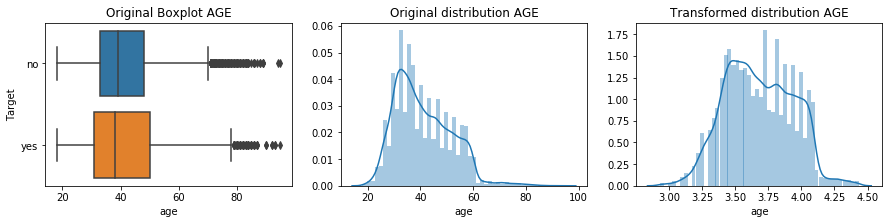

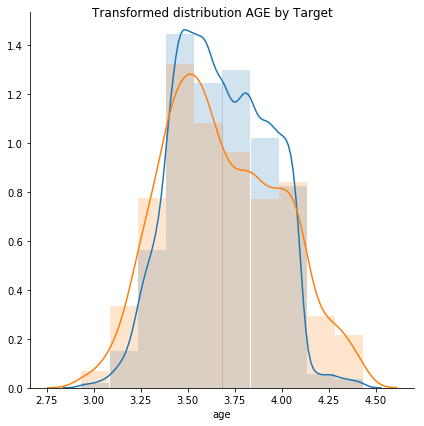

In [13]:
feature, axs = plt.subplots(ncols = 3, figsize=(15, 3))
sns.boxplot(x='age',y='Target',data=df, ax=axs[0]).set_title('Original Boxplot AGE')
sns.distplot(df['age'], kde=True, ax=axs[1]).set_title('Original distribution AGE')
df['age'] = np.log(df['age'])
clip(df,'age')
sns.distplot(df['age'], kde=True, ax=axs[2]).set_title('Transformed distribution AGE')
_, bins = np.histogram(df['age'])
sns.FacetGrid(df, size=6, hue="Target").map(sns.distplot, 'age', bins=bins, hist_kws={'alpha':.2}).fig.suptitle('Transformed distribution AGE by Target')

Fixing the 'balance':

Text(0.5, 0.98, 'Transformed distribution BALANCE by Target')

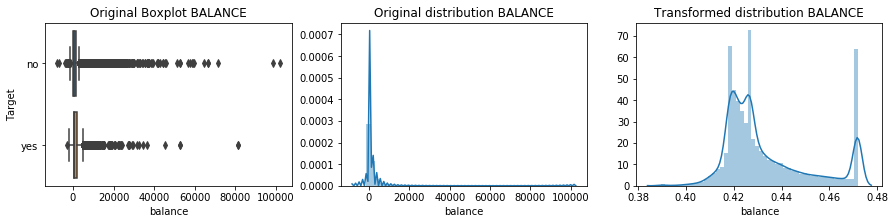

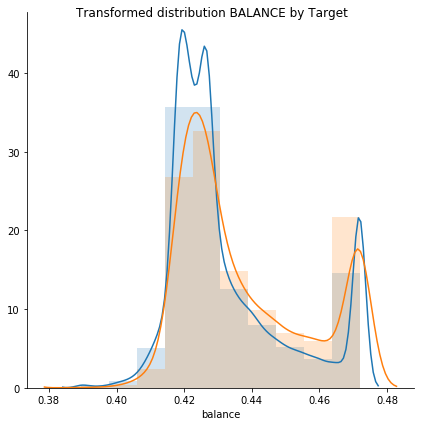

In [14]:
df['missing balance'] = np.where(df['balance']==0, 1, 0)
df.balance = df.balance.replace(0,df.balance[df.balance!=0].median()) 
feature, axs = plt.subplots(ncols = 3, figsize=(15, 3))
sns.boxplot(x='balance',y='Target',data=df, ax=axs[0]).set_title('Original Boxplot BALANCE')
sns.distplot(df['balance'], kde=True, ax=axs[1]).set_title('Original distribution BALANCE')
normalize('balance')
df['balance'] = (df['balance'])**(1/3)
clip(df,'balance')
sns.distplot(df['balance'], kde=True, ax=axs[2]).set_title('Transformed distribution BALANCE')
_, bins = np.histogram(df['balance'])
sns.FacetGrid(df, size=6, hue="Target").map(sns.distplot, 'balance', bins=bins, hist_kws={'alpha':.2}).fig.suptitle('Transformed distribution BALANCE by Target')

Fixing the 'campaign':

Text(0.5, 0.98, 'Transformed distribution CAMPAIGN by Target')

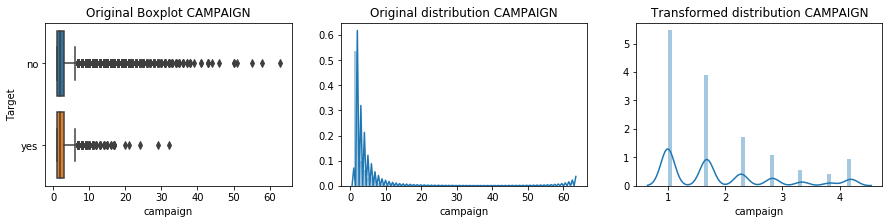

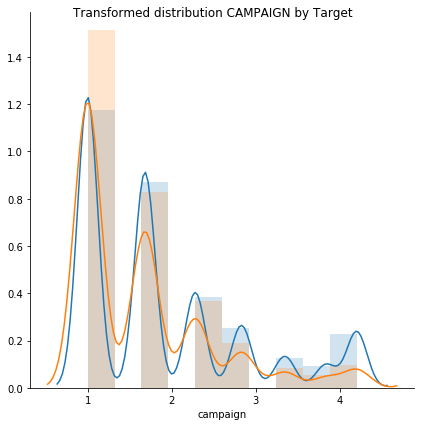

In [15]:
feature, axs = plt.subplots(ncols = 3, figsize=(15, 3))
sns.boxplot(x='campaign',y='Target',data=df, ax=axs[0]).set_title('Original Boxplot CAMPAIGN')
sns.distplot(df['campaign'], kde=True, ax=axs[1]).set_title('Original distribution CAMPAIGN')
df['campaign'] = (df['campaign'])**(3/4)
clip(df,'campaign')
sns.distplot(df['campaign'], kde=True, ax=axs[2]).set_title('Transformed distribution CAMPAIGN')
_, bins = np.histogram(df['campaign'])
sns.FacetGrid(df, size=6, hue="Target").map(sns.distplot, 'campaign', bins=bins, hist_kws={'alpha':.2}).fig.suptitle('Transformed distribution CAMPAIGN by Target')

Fixing the 'pdays':

Text(0.5, 0.98, 'Transformed distribution PDAYS by Target')

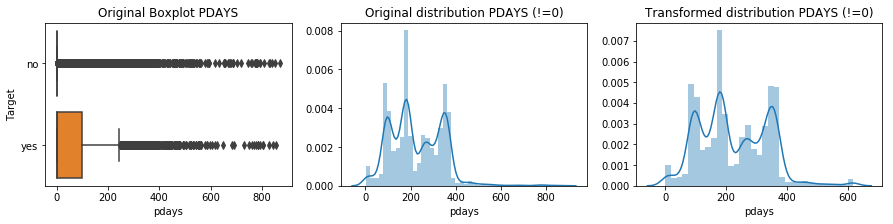

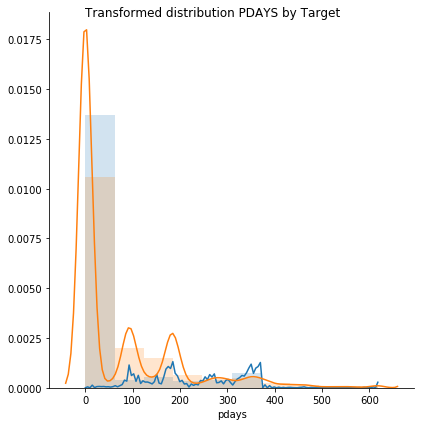

In [16]:
df['never contacted'] = np.where(df['pdays']==(-1), 1, 0)
df.pdays = df.pdays.replace((-1),0) 
feature, axs = plt.subplots(ncols = 3, figsize=(15, 3))
sns.boxplot(x='pdays',y='Target',data=df, ax=axs[0]).set_title('Original Boxplot PDAYS')
sns.distplot(df['pdays'][df['pdays']!=0], kde=True, ax=axs[1]).set_title('Original distribution PDAYS (!=0)')
Q1 = np.percentile(df[df['pdays']!=0]['pdays'],25)
Q3 = np.percentile(df[df['pdays']!=0]['pdays'],75)
df['pdays'].clip(Q1-1.5*(Q3-Q1), Q3+1.5*(Q3-Q1), inplace=True)
sns.distplot(df['pdays'][df['pdays']!=0], kde=True, ax=axs[2]).set_title('Transformed distribution PDAYS (!=0)')
_, bins = np.histogram(df['pdays'])
sns.FacetGrid(df, size=6, hue="Target").map(sns.distplot, 'pdays', bins=bins, hist_kws={'alpha':.2}).fig.suptitle('Transformed distribution PDAYS by Target')

Fixing the 'previous':

Text(0.5, 0.98, 'Transformed distribution PREVIOUS by Target')

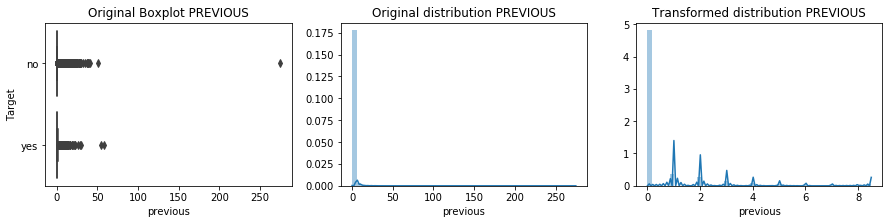

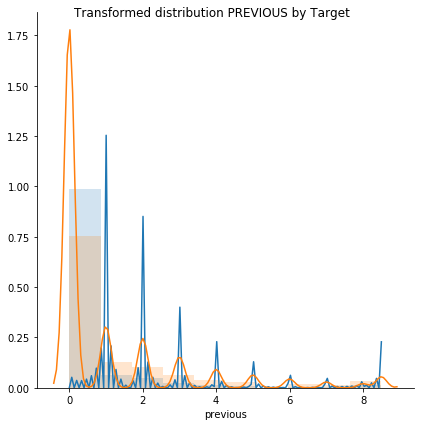

In [17]:
feature, axs = plt.subplots(ncols = 3, figsize=(15, 3))
sns.boxplot(x='previous',y='Target',data=df, ax=axs[0]).set_title('Original Boxplot PREVIOUS')
sns.distplot(df['previous'], kde=True, ax=axs[1]).set_title('Original distribution PREVIOUS')
Q1 = np.percentile(df[df['previous']!=0]['previous'],25)
Q3 = np.percentile(df[df['previous']!=0]['previous'],75)
df['previous'].clip(Q1-1.5*(Q3-Q1), Q3+1.5*(Q3-Q1), inplace=True)
sns.distplot(df['previous'], kde=True, ax=axs[2]).set_title('Transformed distribution PREVIOUS')
_, bins = np.histogram(df['previous'])
sns.FacetGrid(df, size=6, hue="Target").map(sns.distplot, 'previous', bins=bins, hist_kws={'alpha':.2}).fig.suptitle('Transformed distribution PREVIOUS by Target')

In the case of classification problems where input variables are also categorical, we can use statistical tests to determine whether the output variable is dependent or independent of the input variables. If independent, then the input variable is a candidate for a feature that may be irrelevant to the problem and removed from the dataset.

The Pearson’s chi-squared statistical hypothesis is an example of a test for independence between categorical variables.

In [18]:
for i in object_cols:   
    # contingency table
    print('Feature =',i)
    table = np.array(pd.crosstab(df['Target'], df[i], margins = False))
    stat, p, dof, expected = chi2_contingency(table)
    print('dof = %d' % dof)
    # interpret test-statistic
    prob = 0.95
    critical = chi2.ppf(prob, dof)
    print('probability = %.3f, critical = %.3f, stat = %.3f' % (prob, critical, stat))
    if abs(stat) >= critical:
        print('Dependent (reject H0)')
    else:
        print('Independent (fail to reject H0)')
    # interpret p-value
    alpha = 1.0 - prob
    print('significance = %.3f, p = %.3f' % (alpha, p))
    if p <= alpha:
        print('Dependent (reject H0)\n')
    else:
        print('Independent (fail to reject H0)\n')

Feature = job
dof = 11
probability = 0.950, critical = 19.675, stat = 836.105
Dependent (reject H0)
significance = 0.050, p = 0.000
Dependent (reject H0)

Feature = marital
dof = 2
probability = 0.950, critical = 5.991, stat = 196.496
Dependent (reject H0)
significance = 0.050, p = 0.000
Dependent (reject H0)

Feature = education
dof = 3
probability = 0.950, critical = 7.815, stat = 238.924
Dependent (reject H0)
significance = 0.050, p = 0.000
Dependent (reject H0)

Feature = default
dof = 1
probability = 0.950, critical = 3.841, stat = 22.202
Dependent (reject H0)
significance = 0.050, p = 0.000
Dependent (reject H0)

Feature = housing
dof = 1
probability = 0.950, critical = 3.841, stat = 874.822
Dependent (reject H0)
significance = 0.050, p = 0.000
Dependent (reject H0)

Feature = loan
dof = 1
probability = 0.950, critical = 3.841, stat = 209.617
Dependent (reject H0)
significance = 0.050, p = 0.000
Dependent (reject H0)

Feature = contact
dof = 2
probability = 0.950, critical = 5.99

None of the categorical features is irrelevant.

Plotting the numerical feature distributions:

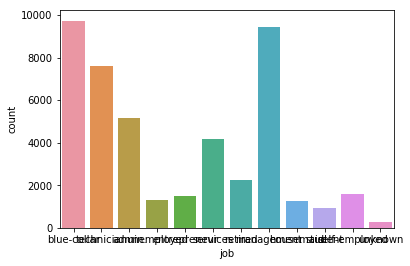

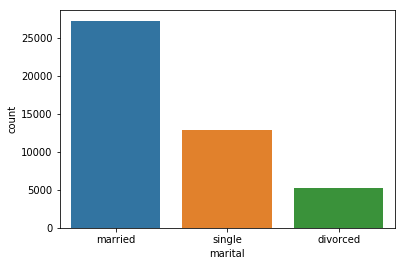

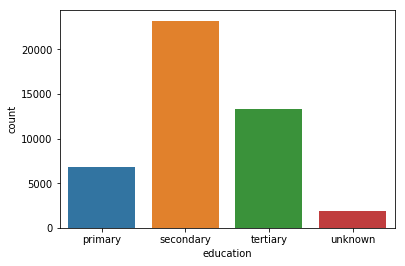

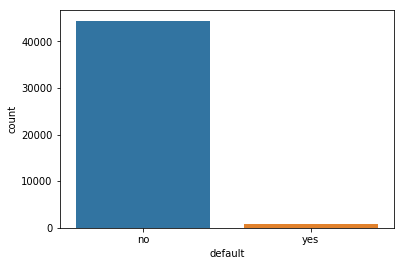

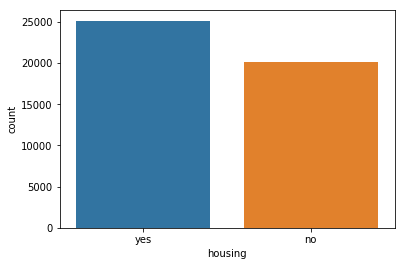

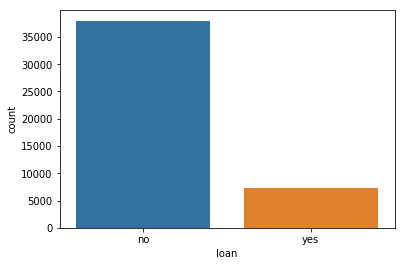

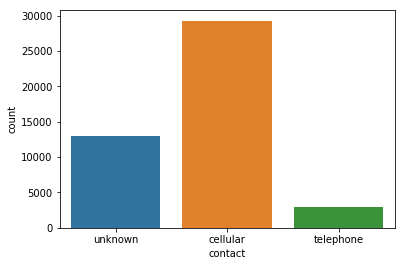

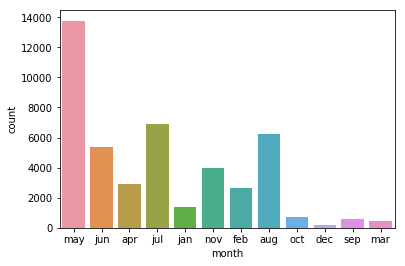

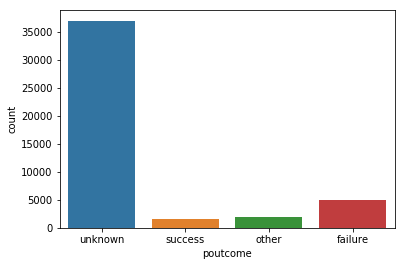

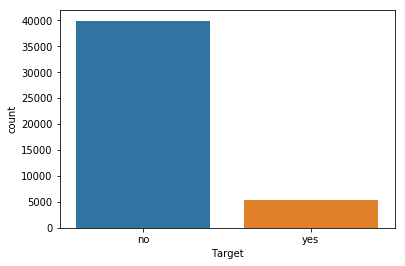

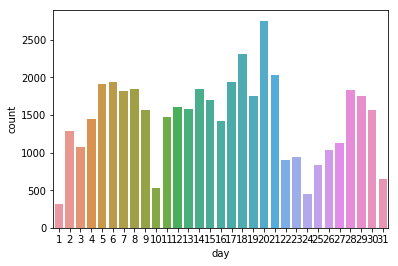

In [19]:
for i in object_cols:
    sns.countplot(df[i])
    plt.show()

### Considerations:
- 'default' and 'putcome' show one class much bigger than the others within the feature. It might be worth to try to drop these features, since it is unlikely that they add predictive value.
- I will consider unknown values as a separate class for all the features.

## Multivariate analysis:

Identify Correlation in data:

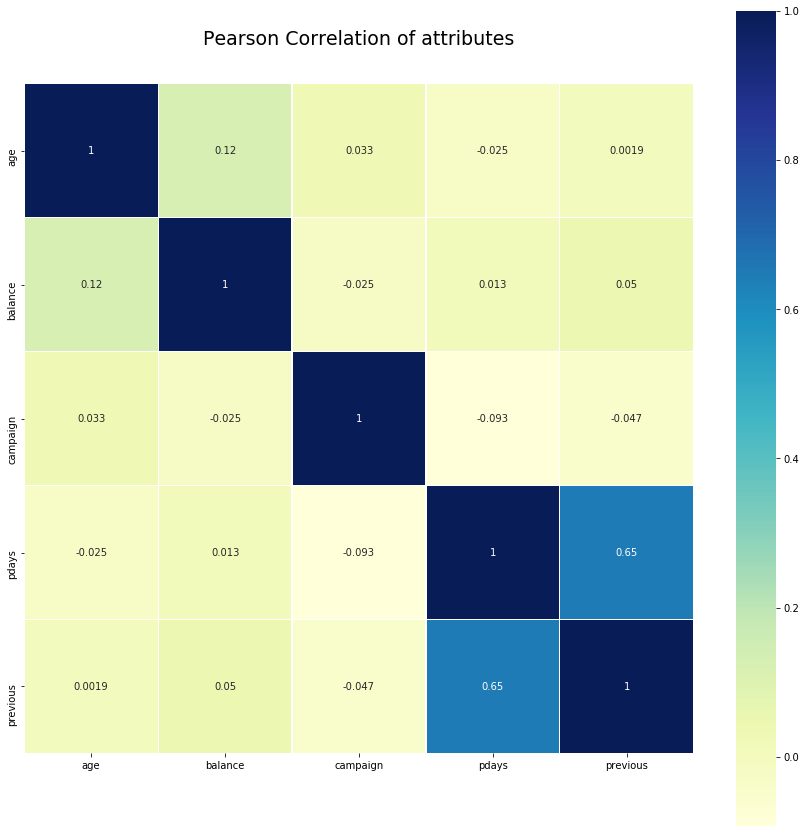

In [20]:
colormap = plt.cm.viridis # Color range to be used in heatmap
plt.figure(figsize=(15,15))
plt.title('Pearson Correlation of attributes', y=1.05, size=19)
sns.heatmap(df[numerical_cols].corr(),
            linewidths=0.1,
            vmax=1.0, 
            square=True, 
            cmap='YlGnBu', 
            linecolor='white',
            annot=True)

There is a strong positive correlation between 'pdays' and 'previous'. The correlation is < 0.7 (critical value) and then I am going to keep both the features in the model.

## Encoding

Binary variables: 'default', 'housing', 'loan' and 'Target'

In [21]:
col_binary = ['default','housing','loan','Target']
for i in col_binary:
    df[i] = np.where(df[i].str.contains('yes'), 1, 0)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,Target,missing balance,never contacted
3610,3.738281,blue-collar,married,primary,0,0.457365,1,0,unknown,15,may,2.828427,0,0.0,unknown,0,0,1
11677,3.611328,technician,married,secondary,0,0.452836,0,0,unknown,20,jun,1.681793,0,0.0,unknown,0,0,1
33018,3.464844,admin.,married,secondary,0,0.433001,1,0,cellular,17,apr,2.828427,0,0.0,unknown,0,0,1
44323,3.970703,blue-collar,married,primary,0,0.422803,0,0,cellular,28,jul,2.279507,181,1.0,success,1,0,0
8119,3.464844,technician,single,tertiary,0,0.421972,1,0,unknown,2,jun,3.343702,0,0.0,unknown,0,0,1


Odinal encoding: 'education' and 'month'

In [22]:
cleanup_nums = {'education':     {'primary': 1, 'secondary': 2, 'tertiary': 3, 'unknown': 4},
                'month': {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4,'may': 5, 'jun': 6, 'jul': 7, 'aug': 8,'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}}
df.replace(cleanup_nums, inplace=True)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,Target,missing balance,never contacted
3610,3.738281,blue-collar,married,1,0,0.457365,1,0,unknown,15,5,2.828427,0,0.0,unknown,0,0,1
11677,3.611328,technician,married,2,0,0.452836,0,0,unknown,20,6,1.681793,0,0.0,unknown,0,0,1
33018,3.464844,admin.,married,2,0,0.433001,1,0,cellular,17,4,2.828427,0,0.0,unknown,0,0,1
44323,3.970703,blue-collar,married,1,0,0.422803,0,0,cellular,28,7,2.279507,181,1.0,success,1,0,0
8119,3.464844,technician,single,3,0,0.421972,1,0,unknown,2,6,3.343702,0,0.0,unknown,0,0,1


Target encoding: 'job', 'marital', 'contact' and 'poutcome'

In [23]:
col_target = ['job','marital','contact','poutcome']

def get_data_splits(dataframe, valid_fraction=0.1):
    valid_fraction = 0.1
    valid_size = int(len(dataframe) * valid_fraction)
    train = dataframe[:-valid_size * 2]
    valid = dataframe[-valid_size * 2:-valid_size] # valid size == test size, last two sections of the data
    test = dataframe[-valid_size:]
    return train, valid, test    

target_enc = ce.TargetEncoder(cols=col_target) # Create the encoder itself
train, valid, _ = get_data_splits(df)
target_enc.fit(train[col_target], train['Target']) # Fit the encoder using the categorical features and target
df = df.join(target_enc.transform(df[col_target]).add_suffix('_target'))
df = df.drop(col_target,axis=1)
    
df.head()

,age,education,default,balance,housing,loan,day,month,campaign,pdays,previous,Target,missing balance,never contacted,job_target,marital_target,contact_target,poutcome_target
3610,3.738281,1,0,0.457365,1,0,15,5,2.828427,0,0.0,0,0,1,0.072849,0.101747,0.039651,0.091272
11677,3.611328,2,0,0.452836,0,0,20,6,1.681793,0,0.0,0,0,1,0.109211,0.101747,0.039651,0.091272
33018,3.464844,2,0,0.433001,1,0,17,4,2.828427,0,0.0,0,0,1,0.122714,0.101747,0.149725,0.091272
44323,3.970703,1,0,0.422803,0,0,28,7,2.279507,181,1.0,1,0,0,0.072849,0.101747,0.149725,0.654712
8119,3.464844,3,0,0.421972,1,0,2,6,3.343702,0,0.0,0,0,1,0.109211,0.147821,0.039651,0.091272


Pairplot: I calculated the most important features by running a Light GBM and calling the features_importance method.

PS: You can zoom the chart by double-clicking on it.

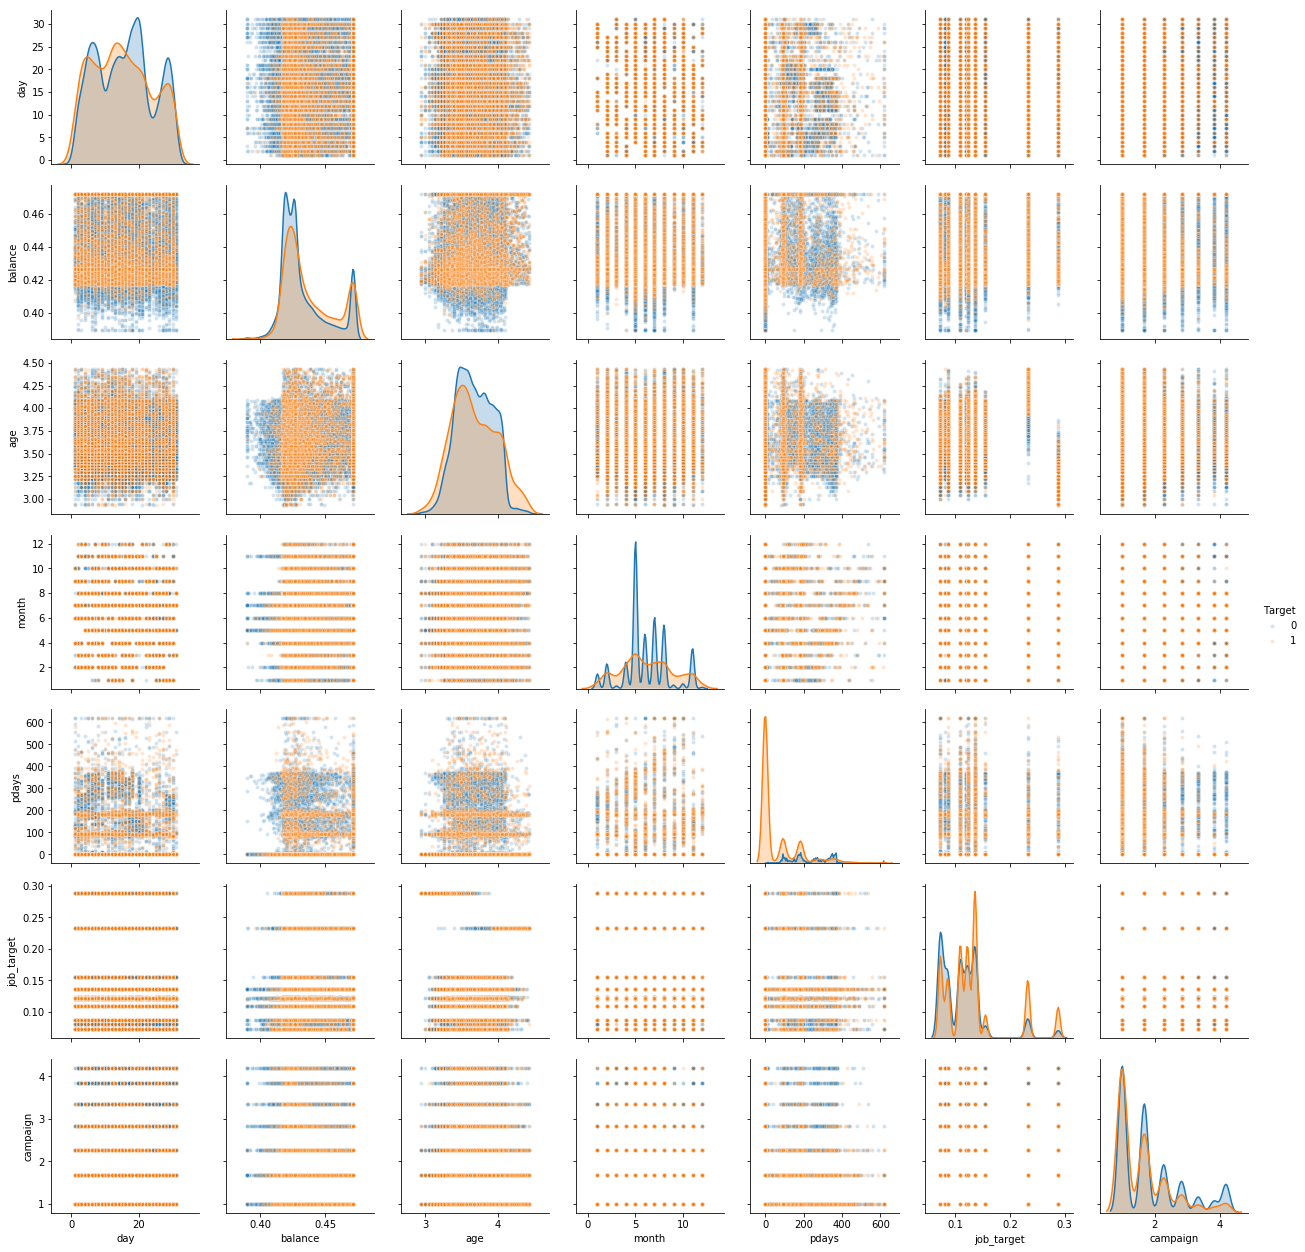

In [24]:
model = LGBMClassifier(random_state=1)
model.fit(df.drop('Target',axis=1), df['Target'])
features_importance = pd.concat([pd.DataFrame(df.drop('Target',axis=1).columns),pd.DataFrame(model.feature_importances_)], axis=1)
features_importance.columns = ['Feature','Importance']
features_importance = features_importance.sort_values('Importance',ascending=False)
sns.pairplot(df,
             hue='Target',
             hue_order=[0,1],  
             plot_kws={"s": 15,'alpha': 0.2},
             vars=list(features_importance['Feature'][:7]))

Placing Target column on the right:

In [24]:
cols = list(df.columns)
cols.remove('Target')
cols.append('Target')
df = df[cols]

Normalize the data: the target column doesn't need to be normalized, but it is already between 0 and 1, then we can apply the normalization to the entire dataset.

In [25]:
columns = df.columns.to_list()
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df))
df.columns = columns
df.head()

,age,education,default,balance,housing,loan,day,month,campaign,pdays,previous,missing balance,never contacted,job_target,marital_target,contact_target,poutcome_target,Target
0,0.536458,0.000000,0.0,0.824061,1.0,0.0,0.466667,0.363636,0.571604,0.00000,0.000000,0.0,1.0,0.000000,0.0,0.0,0.0,0.0
1,0.451823,0.333333,0.0,0.768955,0.0,0.0,0.633333,0.454545,0.213142,0.00000,0.000000,0.0,1.0,0.168828,0.0,0.0,0.0,0.0
2,0.354167,0.333333,0.0,0.527642,1.0,0.0,0.533333,0.272727,0.571604,0.00000,0.000000,0.0,1.0,0.231525,0.0,1.0,0.0,0.0
3,0.691406,0.000000,0.0,0.403581,0.0,0.0,0.900000,0.545455,0.400000,0.29288,0.117647,0.0,0.0,0.000000,0.0,1.0,1.0,1.0
4,0.354167,0.666667,0.0,0.393469,1.0,0.0,0.033333,0.454545,0.732689,0.00000,0.000000,0.0,1.0,0.168828,1.0,0.0,0.0,0.0


Calculate 'Target' ratio:

In [26]:
n_true = len(df.loc[df['Target'] == True])
n_false = len(df.loc[df['Target'] == False])
print("Number of Yes: {0} ({1:2.2f}%)".format(n_true, (n_true / (n_true + n_false)) * 100 ))
print("Number of No: {0} ({1:2.2f}%)".format(n_false, (n_false / (n_true + n_false)) * 100))

Number of Yes: 5289 (11.70%)
Number of No: 39922 (88.30%)


## Spliting the data in train and test set
I am going to use 70% of data for training and 30% for testing. I will use grid-search with cross-validation to search for the hyperparameters. Then, I will use the testset to evaluate the models.

In [27]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=1)
for train_index, test_index in split.split(df, df['Target']):
    train = df.loc[train_index]
    test = df.loc[test_index]

X_train = train.drop('Target',axis=1)
X_test = test.drop('Target',axis=1)
y_train = train['Target']
y_test = test['Target']

Let's check the split of data:

In [28]:
print("{0:0.2f}% data is in training set".format((len(X_train)/len(df.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(df.index)) * 100))

70.00% data is in training set
30.00% data is in test set


Check 'Target' ratio of the split data. This is a sanity check to assure a correct stratified sampling of the Target: we would like to have a similar Yes / No ratio in training and test set.

In [29]:
print("Original Yes Values       {0} ({1:0.4f}%)".format(len(df.loc[df['Target'] == 1]), (len(df.loc[df['Target'] == 1])/len(df.index)) * 100))
print("Original No Values        {0} ({1:0.4f}%)".format(len(df.loc[df['Target'] == 0]), (len(df.loc[df['Target'] == 0])/len(df.index)) * 100))
print("")
print("Training Yes Values       {0} ({1:0.4f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training No Values        {0} ({1:0.4f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Yes Values           {0} ({1:0.4f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test No Values            {0} ({1:0.4f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))

Original Yes Values       5289 (11.6985%)
Original No Values        39922 (88.3015%)

Training Yes Values       3702 (11.6978%)
Training No Values        27945 (88.3022%)

Test Yes Values           1587 (11.7001%)
Test No Values            11977 (88.2999%)


Defining 2 functions to evaluate the models:

In [30]:
def draw_cm(actual,predicted):
    """
    Return the confusion matrix
    """
    cm = metrics.confusion_matrix(actual,predicted,[1,0])
    sns.heatmap(cm, annot=True,  fmt='.0f', xticklabels = ["1", "0"] , yticklabels = ["1", "0"] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

def models_evaluation(models,ROC_size=[6,4]):
    """
    Return the summary report for every model contained in the 'models' list and a ROC curve chart to visually compare all the models
    """
    y_preds = []
    AUCs = []
    FPRs =[]
    TPRs = []
    for i in range(0,len(models)):
        start=datetime.now()
        model = models[i].get('model')
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_train = model.predict(X_train)
        a = round(metrics.accuracy_score(y_test, y_pred),4)
        a_train = round(metrics.accuracy_score(y_train, y_pred_train),4)
        p = round(metrics.precision_score(y_test, y_pred),4)
        p_train = round(metrics.precision_score(y_train, y_pred_train),4)
        r = round(metrics.recall_score(y_test, y_pred),4)
        r_train = round(metrics.recall_score(y_train, y_pred_train),4)
        f = round(metrics.f1_score(y_test, y_pred),4)
        f_train = round(metrics.f1_score(y_train, y_pred_train),4)
        auc = round(metrics.roc_auc_score(y_test, model.predict_proba(X_test)[:,1]),4)
        auc_train = round(metrics.roc_auc_score(y_train, model.predict_proba(X_train)[:,1]),4)
        fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
        print('\nMODEL:', models[i].get('label'),'\n')
        print(metrics.classification_report(y_test, y_pred, digits=4))
        print('\n\nComparison for class 1 between Training and Test set:')
        print('\nAccuracy = %0.4f  (%0.4f on Training)'% (a,a_train))  
        print('Precision = %0.4f  (%0.4f on Training)'% (p,p_train)) 
        print('Recall = %0.4f  (%0.4f on Training)'% (r,r_train)) 
        print('F1 = %0.4f  (%0.4f on Training)'% (f,f_train)) 
        print('AUC = %0.4f  (%0.4f on Training)'% (auc,auc_train)) 
        draw_cm(y_test,y_pred)
        y_preds.append(y_pred)
        AUCs.append(auc)
        FPRs.append(fpr)
        TPRs.append(tpr)
        stop=datetime.now()
        execution_time = stop-start
        print('\nExecution time =',execution_time,'\n')
        print('\n##################################################################################################\n')
    #ROC Curves
    plt.figure(figsize=(ROC_size[0],ROC_size[1]))
    for i in range(0,len(models)):
        plt.plot(FPRs[i], TPRs[i], label='%s AUC = %0.4f' % (models[i].get('label'), AUCs[i]))
    # Custom settings for the plot 
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Specificity (False Positive Rate)')
    plt.ylabel('Sensitivity (True Positive Rate)')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show() 

As I mentioned earlier, I will not use the entire dataset for hyperparameters tuning using GridSearch with cross-validation, but a smaller and representative subset of the original data.

In [31]:
# Dataset for GridSearchCV
df_GS = df.sample(frac=0.19,random_state=14)
df_GS.reset_index(inplace=True,drop=True)
X_GS = df_GS.drop('Target',axis=1)
y_GS = df_GS['Target']

## Grid search with cross-validation for hyperparameters tuning:

I am going to use AUC as my reference score.

#### KNN

The optimal number of neighbors is 3


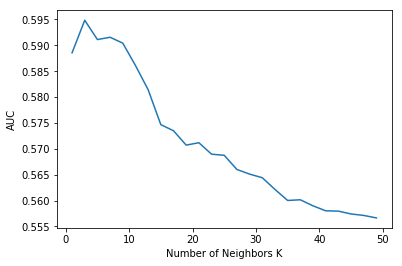

Execution time = 0:00:46.433042


In [116]:
start=datetime.now()

# creating odd list of K for KNN
myList = list(range(1,50))

# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))

# empty list that will hold accuracy scores
scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_GS, y_GS)
    scorer = make_scorer(roc_auc_score)
    score = cross_val_score(knn, X_GS, y_GS, cv=10, scoring=scorer).mean() # evaluate score
    scores.append(score)  

# changing to misclassification error
scores = [x for x in scores]

# determining best k
optimal_k = neighbors[scores.index(max(scores))]
n_neighbors = optimal_k
print("The optimal number of neighbors is %d" % optimal_k)

# plot misclassification error vs k
plt.plot(neighbors, scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('AUC')
plt.show()

stop=datetime.now()
execution_time_knn = stop-start
print('Execution time =',execution_time_knn)

Saving KNN hyperparameters:

In [32]:
optimal_k = 3

#### LOGISTI REGRESSION

In [78]:
start=datetime.now()
param_grid = [{'solver': ['newton-cg','lbfgs', 'liblinear','sag','saga']}]
scorer = make_scorer(roc_auc_score)
grid_search_logistic = GridSearchCV(LogisticRegression(random_state=1), param_grid, cv=10, scoring=scorer)
grid_search_logistic.fit(X_GS, y_GS)
stop=datetime.now()
execution_time_logistic = stop-start
print('Execution time =',execution_time_logistic,'\n')
print('The best combination of hyperparameters is:\n\n',grid_search_logistic.best_params_)

Execution time = 0:00:04.009644 

The best combination of hyperparameters is:

 {'solver': 'newton-cg'}


Saving Logistic Regression hyperparameters:

In [33]:
logistic_hyperparameters = {'solver': 'newton-cg'}

#### SVM

At the first attempt, the model was not converging to a solution: this is the reason why I had to set 'max_iter'=10000.

In [38]:
start=datetime.now()
param_grid = [{'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 
               'C': [0.1, 1, 10],
               'gamma': [0.1, 1, 10]}]
scorer = make_scorer(roc_auc_score)
grid_search_svm = GridSearchCV(SVC(max_iter=10000, random_state=1), param_grid, cv=10, scoring=scorer)
grid_search_svm.fit(X_GS, y_GS)
stop=datetime.now()
execution_time_svm = stop-start
print('Execution time =',execution_time_svm,'\n')
print('The best combination of hyperparameters is:\n\n',grid_search_svm.best_params_)

Execution time = 0:08:30.910986 

The best combination of hyperparameters is:

 {'C': 10, 'gamma': 1, 'kernel': 'rbf'}


Saving SVM hyperparameters:

In [34]:
svm_hyperparameters = {'C': 10, 'gamma': 1, 'kernel': 'rbf'}

#### DECISION TREE

In [97]:
start=datetime.now()
param_grid = [{'max_depth': list(range(1,X_train.shape[1]+1))}]
scorer = make_scorer(roc_auc_score)
grid_search_dtree = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid, cv=10, scoring=scorer)
grid_search_dtree.fit(X_GS, y_GS)
stop=datetime.now()
execution_time_dtree = stop-start
print('Execution time =',execution_time_dtree,'\n')
print('The best combination of hyperparameters is:\n\n',grid_search_dtree.best_params_)

Execution time = 0:00:04.381770 

The best combination of hyperparameters is:

 {'max_depth': 8}


Saving Decision Tree hyperparameters:

In [35]:
dtree_hyperparameters = {'max_depth': 8}

#### BAGGING

In [99]:
start=datetime.now()
param_grid = [{'n_estimators': [200,400],
               'max_samples': [250,500],
               'oob_score': [True,False]}]
scorer = make_scorer(roc_auc_score)
grid_search_bag = GridSearchCV(BaggingClassifier(random_state=1), param_grid, cv=10, scoring=scorer)
grid_search_bag.fit(X_GS, y_GS)
stop=datetime.now()
execution_time_bag = stop-start
print('Execution time =',execution_time_bag,'\n')
print('The best combination of hyperparameters is:\n\n',grid_search_bag.best_params_)

Execution time = 0:02:10.449427 

The best combination of hyperparameters is:

 {'max_samples': 500, 'n_estimators': 200, 'oob_score': True}


Saving Bagging hyperparameters:

In [36]:
bag_hyperparameters = {'max_samples': 500, 'n_estimators': 200, 'oob_score': True}

#### RANDOM FOREST

In [130]:
start=datetime.now()
param_grid = [{'n_estimators': [200,300], 
               'max_features': [10,12],
               'max_depth': [6,9,12], # I keep the max_depth small to visualize one of the tree
               'max_leaf_nodes': [100,200],
               'bootstrap': [True,False]}]
scorer = make_scorer(roc_auc_score)
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=1), param_grid, cv=10, scoring=scorer)
grid_search_rf.fit(X_GS, y_GS)
stop=datetime.now()
execution_time_rf = stop-start
print('Execution time =',execution_time_rf,'\n')
print('The best combination of hyperparameters is:\n\n',grid_search_rf.best_params_)

Execution time = 0:24:14.902632 

The best combination of hyperparameters is:

 {'bootstrap': False, 'max_depth': 12, 'max_features': 12, 'max_leaf_nodes': 200, 'n_estimators': 200}


Saving Random Forest hyperparameters:

In [37]:
rf_hyperparameters = {'bootstrap': False, 'max_depth': 9, 'max_features': 10, 'max_leaf_nodes': 100, 'n_estimators': 200}

#### ADABOOST

In [132]:
start=datetime.now()
param_grid = [{'n_estimators': [100,200,300,400],
               'learning_rate': [0.1,0.5,1]}]
scorer = make_scorer(roc_auc_score)
grid_search_ada = GridSearchCV(AdaBoostClassifier(random_state=1), param_grid, cv=10, scoring=scorer)
grid_search_ada.fit(X_GS, y_GS)
stop=datetime.now()
execution_time_ada = stop-start
print('Execution time =',execution_time_ada,'\n')
print('The best combination of hyperparameters is:\n\n',grid_search_ada.best_params_)

Execution time = 0:03:20.585946 

The best combination of hyperparameters is:

 {'learning_rate': 1, 'n_estimators': 300}


Saving Adaboost hyperparameters:

In [38]:
ada_hyperparameters = {'learning_rate': 1, 'n_estimators': 300}

#### XGBOOST

In [57]:
start=datetime.now()
param_grid = [{'n_estimators': [200,400],
               'learning_rate': [0.1,0.5],
               'max_depth': [3,6],
               'subsample': [0.5,0.8],
               'colsample_bytree': [0.5,0.8],
               'gamma': [0.1,5],
               'booster': ['dart','gblinear']}]
scorer = make_scorer(roc_auc_score)
grid_search_xgb = GridSearchCV(XGBClassifier(random_state=1), param_grid, cv=10, scoring=scorer)
grid_search_xgb.fit(X_GS, y_GS)
stop=datetime.now()
execution_time_xgb = stop-start
print('Execution time =',execution_time_xgb,'\n')
print('The best combination of hyperparameters is:\n\n',grid_search_xgb.best_params_)

Execution time = 2:57:12.561510 

The best combination of hyperparameters is:

 {'booster': 'dart', 'colsample_bytree': 0.5, 'gamma': 0.1, 'learning_rate': 0.5, 'max_depth': 6, 'n_estimators': 400, 'subsample': 0.8}


Saving XGBoost hyperparameters:

In [39]:
xgb_hyperparameters = {'booster': 'dart', 
                       'colsample_bytree': 0.5, 
                       'gamma': 0.1, 
                       'learning_rate': 0.5, 
                       'max_depth': 6, 
                       'n_estimators': 400, 
                       'subsample': 0.8}

#### LIGHT GBM

In [77]:
start=datetime.now()
param_grid = [{
               'application': ['binary'],
               'objective': ['binary'],
               'metric': ['binary_logloss'],
               'is_unbalance': ['true'],
               'feature_fraction': [0.5],
               'bagging_fraction': [0.5],
               'bagging_freq': [20],
               'verbose': [0],
               'erbose_eval': [False,True],
               'booster': ['dart','gbdt'],
               'num_leaves': [10,15],
               'max_depth': [6,9,12],
               'max_bin':[50,100,150],
               'n_estimators':[200,400],
               'learning_rate': [0.1,0.5,1]
              }]
scorer = make_scorer(roc_auc_score)
grid_search_lgbm = GridSearchCV(LGBMClassifier(random_state=1), param_grid, cv=10, scoring=scorer)
grid_search_lgbm.fit(X_GS, y_GS)
stop=datetime.now()
execution_time_lgbm = stop-start
print('Execution time =',execution_time_lgbm,'\n')
print('The best combination of hyperparameters is:\n\n',grid_search_lgbm.best_params_)

Execution time = 0:26:59.158481 

The best combination of hyperparameters is:

 {'application': 'binary', 'bagging_fraction': 0.5, 'bagging_freq': 20, 'booster': 'dart', 'erbose_eval': False, 'feature_fraction': 0.5, 'is_unbalance': 'true', 'learning_rate': 0.1, 'max_bin': 50, 'max_depth': 9, 'metric': 'binary_logloss', 'n_estimators': 200, 'num_leaves': 10, 'objective': 'binary', 'verbose': 0}


Saving Light GBM hyperparameters:

In [40]:
lgbm_hyperparameters = {'application': 'binary', 
                        'bagging_fraction': 0.5, 
                        'bagging_freq': 20, 
                        'booster': 'dart', 
                        'erbose_eval': False, 
                        'feature_fraction': 0.5, 
                        'is_unbalance': 'true', 
                        'learning_rate': 0.1, 
                        'max_bin': 50, 
                        'max_depth': 9, 
                        'metric': 'binary_logloss', 
                        'n_estimators': 200, 
                        'num_leaves': 10, 
                        'objective': 'binary', 
                        'verbose': 0}

Below are defined all the models:

In [41]:
naive_bayes = GaussianNB()

knn = KNeighborsClassifier(n_neighbors = optimal_k)

logistic = LogisticRegression(solver=logistic_hyperparameters.get('solver'),
                              random_state=1)

svm = SVC(kernel=svm_hyperparameters.get('kernel'),
          C=svm_hyperparameters.get('C'),
          gamma=svm_hyperparameters.get('gamma'),
          max_iter=10000,
          probability=True,
          random_state=1)

dtree = DecisionTreeClassifier(max_depth=dtree_hyperparameters.get('max_depth'),
                               random_state=1)

rf = RandomForestClassifier(n_estimators=rf_hyperparameters.get('n_estimators'),
                            max_features=rf_hyperparameters.get('max_features'),
                            max_depth=rf_hyperparameters.get('max_depth'),
                            max_leaf_nodes=rf_hyperparameters.get('max_leaf_nodes'),
                            bootstrap=rf_hyperparameters.get('bootstrap'),
                            random_state=1)

bag = BaggingClassifier(n_estimators=bag_hyperparameters.get('n_estimators'),
                        max_samples=bag_hyperparameters.get('max_samples'),
                        oob_score=bag_hyperparameters.get('oob_score'),
                        random_state=1)

ada = AdaBoostClassifier(n_estimators=ada_hyperparameters.get('n_estimators'),
                         learning_rate=ada_hyperparameters.get('learning_rate'),
                         random_state=1)

xgb = XGBClassifier(n_estimators=xgb_hyperparameters.get('n_estimators'),
                    learning_rate=xgb_hyperparameters.get('learning_rate'),
                    max_depth=xgb_hyperparameters.get('max_depth'),
                    subsample=xgb_hyperparameters.get('subsample'),
                    colsample_bytree=xgb_hyperparameters.get('colsample_bytree'),
                    gamma=xgb_hyperparameters.get('gamma'),
                    booster=xgb_hyperparameters.get('booster'),
                    random_state=1)

lgbm = LGBMClassifier(application=lgbm_hyperparameters.get('application'),
                      objective=lgbm_hyperparameters.get('objective'),
                      metric=lgbm_hyperparameters.get('metric'),
                      is_unbalance=lgbm_hyperparameters.get('is_unbalance'),
                      feature_fraction=lgbm_hyperparameters.get('feature_fraction'),
                      bagging_fraction=lgbm_hyperparameters.get('bagging_fraction'),
                      bagging_freq=lgbm_hyperparameters.get('bagging_freq'),
                      verbose=lgbm_hyperparameters.get('verbose'),
                      booster=lgbm_hyperparameters.get('booster'),                  
                      erbose_eval=lgbm_hyperparameters.get('erbose_eval'),
                      num_leaves=lgbm_hyperparameters.get('num_leaves'),
                      max_depth=lgbm_hyperparameters.get('max_depth'),
                      max_bin=lgbm_hyperparameters.get('max_bin'),                      
                      n_estimators=lgbm_hyperparameters.get('n_estimators'),     
                      learning_rate=lgbm_hyperparameters.get('learning_rate'),                      
                      random_state=1)

voting_clf = VotingClassifier(estimators=[
#                                           ('Naive Bayes', naive_bayes),
#                                           ('KNN', knn),
#                                           ('Logistic Regression', logistic),
#                                           ('SVM', svm),
#                                           ('Decision Tree', dtree),                                  
                                          ('Random Forest', rf), 
                                          ('Bagging', bag), 
                                          ('Adaboost', ada),  
                                          ('XGBoost', xgb), 
                                          ('Light GBM', lgbm)
                                         ],
                              voting='soft')

Redefining the list of all the models I need to evaluate:

In [42]:
models_list = [{'label': 'Naive Bayes','model': naive_bayes,},
              {'label': 'KNN','model': knn,},    
              {'label': 'Logistic Regression','model': logistic,},
              {'label': 'SVM','model': svm,},
              {'label': 'Decision Tree','model': dtree,},
              {'label': 'Random Forest','model': rf,},
              {'label': 'Bagging','model': bag,},
              {'label': 'Adaboost','model': ada,},
              {'label': 'XGBoost','model': xgb,}, 
              {'label': 'Light GBM','model': lgbm,},
              {'label': 'Voting Classifier','model': voting_clf,}]

Evaluation of all the models contained in 'models_list':


MODEL: Naive Bayes 

              precision    recall  f1-score   support

         0.0     0.9148    0.8763    0.8951     11977
         1.0     0.2912    0.3837    0.3312      1587

   micro avg     0.8186    0.8186    0.8186     13564
   macro avg     0.6030    0.6300    0.6131     13564
weighted avg     0.8418    0.8186    0.8291     13564



Comparison for class 1 between Training and Test set:

Accuracy = 0.8186  (0.8153 on Training)
Precision = 0.2912  (0.2828 on Training)
Recall = 0.3837  (0.3771 on Training)
F1 = 0.3312  (0.3232 on Training)
AUC = 0.7313  (0.7231 on Training)


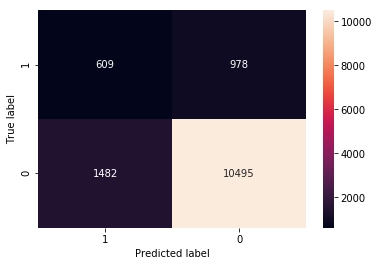


Execution time = 0:00:00.384865 


##################################################################################################


MODEL: KNN 

              precision    recall  f1-score   support

         0.0     0.9062    0.9653    0.9348     11977
         1.0     0.4839    0.2457    0.3260      1587

   micro avg     0.8811    0.8811    0.8811     13564
   macro avg     0.6950    0.6055    0.6304     13564
weighted avg     0.8568    0.8811    0.8636     13564



Comparison for class 1 between Training and Test set:

Accuracy = 0.8811  (0.9164 on Training)
Precision = 0.4839  (0.7639 on Training)
Recall = 0.2457  (0.4125 on Training)
F1 = 0.3260  (0.5357 on Training)
AUC = 0.6618  (0.9462 on Training)


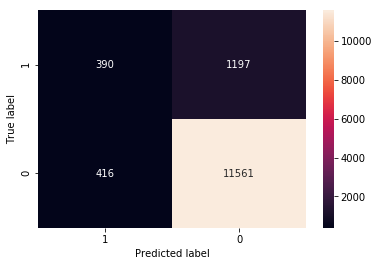


Execution time = 0:00:29.665912 


##################################################################################################


MODEL: Logistic Regression 

              precision    recall  f1-score   support

         0.0     0.8996    0.9901    0.9427     11977
         1.0     0.6911    0.1664    0.2682      1587

   micro avg     0.8938    0.8938    0.8938     13564
   macro avg     0.7954    0.5782    0.6054     13564
weighted avg     0.8752    0.8938    0.8638     13564



Comparison for class 1 between Training and Test set:

Accuracy = 0.8938  (0.8928 on Training)
Precision = 0.6911  (0.6692 on Training)
Recall = 0.1664  (0.1650 on Training)
F1 = 0.2682  (0.2648 on Training)
AUC = 0.7564  (0.7490 on Training)


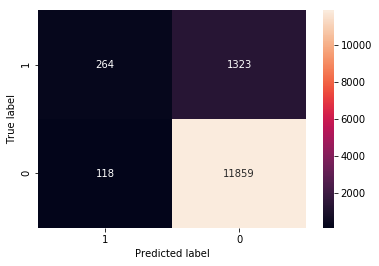


Execution time = 0:00:00.556071 


##################################################################################################


MODEL: SVM 

              precision    recall  f1-score   support

         0.0     0.9016    0.9847    0.9413     11977
         1.0     0.6211    0.1890    0.2899      1587

   micro avg     0.8916    0.8916    0.8916     13564
   macro avg     0.7614    0.5869    0.6156     13564
weighted avg     0.8688    0.8916    0.8651     13564



Comparison for class 1 between Training and Test set:

Accuracy = 0.8916  (0.9084 on Training)
Precision = 0.6211  (0.8370 on Training)
Recall = 0.1890  (0.2690 on Training)
F1 = 0.2899  (0.4072 on Training)
AUC = 0.6576  (0.8163 on Training)


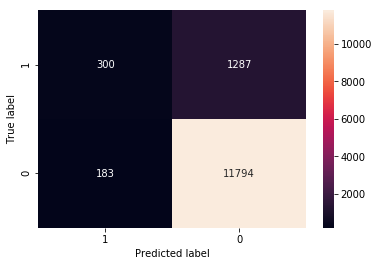


Execution time = 0:02:32.155237 


##################################################################################################


MODEL: Decision Tree 

              precision    recall  f1-score   support

         0.0     0.9019    0.9846    0.9414     11977
         1.0     0.6224    0.1922    0.2937      1587

   micro avg     0.8918    0.8918    0.8918     13564
   macro avg     0.7622    0.5884    0.6176     13564
weighted avg     0.8692    0.8918    0.8657     13564



Comparison for class 1 between Training and Test set:

Accuracy = 0.8918  (0.9017 on Training)
Precision = 0.6224  (0.7606 on Training)
Recall = 0.1922  (0.2326 on Training)
F1 = 0.2937  (0.3562 on Training)
AUC = 0.7322  (0.7732 on Training)


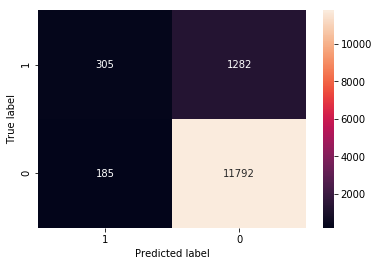


Execution time = 0:00:00.353529 


##################################################################################################


MODEL: Random Forest 

              precision    recall  f1-score   support

         0.0     0.9019    0.9874    0.9427     11977
         1.0     0.6652    0.1890    0.2944      1587

   micro avg     0.8940    0.8940    0.8940     13564
   macro avg     0.7835    0.5882    0.6185     13564
weighted avg     0.8742    0.8940    0.8668     13564



Comparison for class 1 between Training and Test set:

Accuracy = 0.8940  (0.9012 on Training)
Precision = 0.6652  (0.7689 on Training)
Recall = 0.1890  (0.2220 on Training)
F1 = 0.2944  (0.3446 on Training)
AUC = 0.7945  (0.8058 on Training)


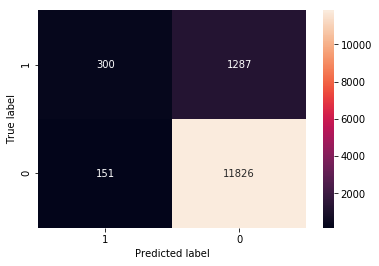


Execution time = 0:00:11.060893 


##################################################################################################


MODEL: Bagging 

              precision    recall  f1-score   support

         0.0     0.9019    0.9860    0.9421     11977
         1.0     0.6433    0.1909    0.2945      1587

   micro avg     0.8930    0.8930    0.8930     13564
   macro avg     0.7726    0.5884    0.6183     13564
weighted avg     0.8717    0.8930    0.8663     13564



Comparison for class 1 between Training and Test set:

Accuracy = 0.8930  (0.8928 on Training)
Precision = 0.6433  (0.6346 on Training)
Recall = 0.1909  (0.1980 on Training)
F1 = 0.2945  (0.3018 on Training)
AUC = 0.7638  (0.7964 on Training)


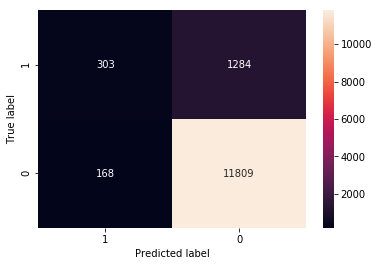


Execution time = 0:00:08.160350 


##################################################################################################


MODEL: Adaboost 

              precision    recall  f1-score   support

         0.0     0.9010    0.9886    0.9428     11977
         1.0     0.6761    0.1802    0.2846      1587

   micro avg     0.8940    0.8940    0.8940     13564
   macro avg     0.7886    0.5844    0.6137     13564
weighted avg     0.8747    0.8940    0.8657     13564



Comparison for class 1 between Training and Test set:

Accuracy = 0.8940  (0.8924 on Training)
Precision = 0.6761  (0.6378 on Training)
Recall = 0.1802  (0.1850 on Training)
F1 = 0.2846  (0.2869 on Training)
AUC = 0.7852  (0.7931 on Training)


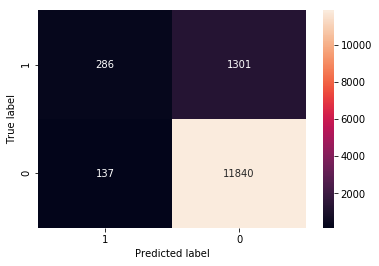


Execution time = 0:00:07.493166 


##################################################################################################


MODEL: XGBoost 

              precision    recall  f1-score   support

         0.0     0.9102    0.9577    0.9334     11977
         1.0     0.4735    0.2873    0.3576      1587

   micro avg     0.8792    0.8792    0.8792     13564
   macro avg     0.6919    0.6225    0.6455     13564
weighted avg     0.8591    0.8792    0.8660     13564



Comparison for class 1 between Training and Test set:

Accuracy = 0.8792  (0.9799 on Training)
Precision = 0.4735  (0.9929 on Training)
Recall = 0.2873  (0.8341 on Training)
F1 = 0.3576  (0.9066 on Training)
AUC = 0.7384  (0.9971 on Training)


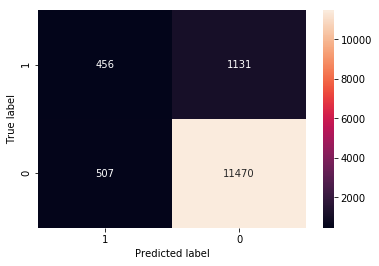


Execution time = 0:03:04.848960 


##################################################################################################


MODEL: Light GBM 

              precision    recall  f1-score   support

         0.0     0.9473    0.8111    0.8739     11977
         1.0     0.3162    0.6591    0.4274      1587

   micro avg     0.7934    0.7934    0.7934     13564
   macro avg     0.6317    0.7351    0.6507     13564
weighted avg     0.8734    0.7934    0.8217     13564



Comparison for class 1 between Training and Test set:

Accuracy = 0.7934  (0.8059 on Training)
Precision = 0.3162  (0.3397 on Training)
Recall = 0.6591  (0.6985 on Training)
F1 = 0.4274  (0.4571 on Training)
AUC = 0.7981  (0.8359 on Training)


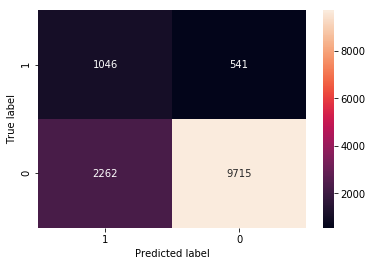


Execution time = 0:00:01.371570 


##################################################################################################


MODEL: Voting Classifier 

              precision    recall  f1-score   support

         0.0     0.9125    0.9717    0.9412     11977
         1.0     0.5815    0.2968    0.3930      1587

   micro avg     0.8927    0.8927    0.8927     13564
   macro avg     0.7470    0.6342    0.6671     13564
weighted avg     0.8738    0.8927    0.8770     13564



Comparison for class 1 between Training and Test set:

Accuracy = 0.8927  (0.9303 on Training)
Precision = 0.5815  (0.8614 on Training)
Recall = 0.2968  (0.4819 on Training)
F1 = 0.3930  (0.6180 on Training)
AUC = 0.7994  (0.9532 on Training)


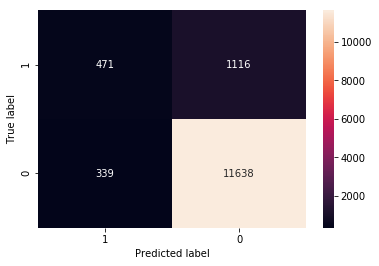


Execution time = 0:03:33.511020 


##################################################################################################



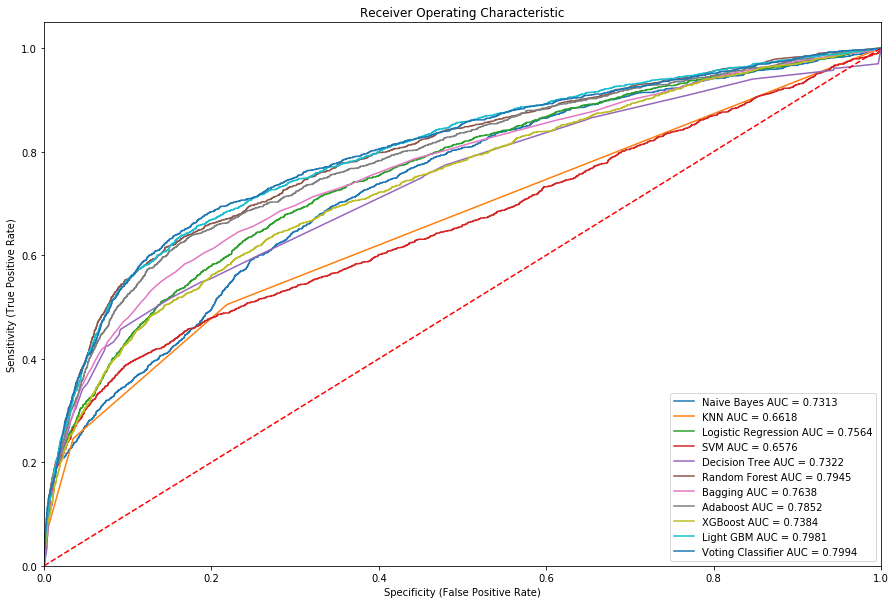

In [43]:
models_evaluation(models_list,ROC_size=[15,10])

Undestand what fuatures are important:

We can use a classifier with the 'feature_importances_' method.

Text(0, 0.5, 'Features')

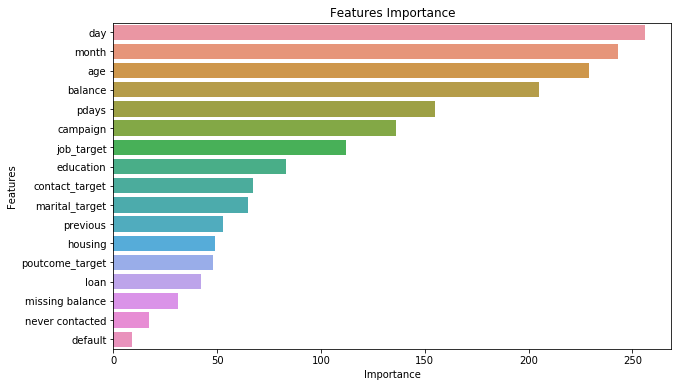

In [49]:
# Set the model to use
classifier=lgbm

# Set the width and height of the figure
plt.figure(figsize=(10,6))

# Add title
plt.title("Features Importance")

# Bar chart showing the importance of the imput features
features_importance = pd.concat([pd.DataFrame(df.drop('Target',axis=1).columns),pd.DataFrame(classifier.feature_importances_)], axis=1)
features_importance.columns = ['Feature','Importance']
features_importance = features_importance.sort_values('Importance',ascending=False)
sns.barplot(x=features_importance.iloc[:,1], y=features_importance.iloc[:,0])

# Add label for vertical axis
plt.xlabel("Importance")
plt.ylabel("Features")

The best model in terms of AUC is the Voting Classifier. However, from a business prospective, I would choose Light GBM because it is definitely easier to mantain and it is much faster. There is definitely space for improvements with regularisation techniques, since it seems that the 2 models (especially the Voting Classifier - because of the XGBoost) overfitted.

Usually Light GBM model is used as a benchmark because is very fast to run, keeping excellent performance at the same time. It is also used as a tester for features engineering. In this case study, I could have used the 'lgbm.feature_importances_' to undestand what are the variables more important and I could have tried to combine them generating new (and hopefully usefull) features. I won't do it now since is not the objective of this case study.

Using this model I can generate 10000 evaluations using samples of the test set:

Text(0.5, 1.0, 'Distribution of the AUC values for samples of the test set')

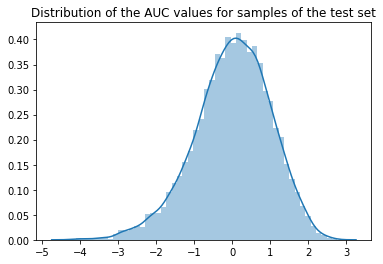

In [44]:
scores = []
for i in range(1,10000):
    sample_test = test.sample(frac=0.01,random_state=i)
    score = round(metrics.roc_auc_score(sample_test['Target'], lgbm.predict_proba(sample_test.drop('Target',axis=1))[:,1]),4)
    scores.append(score)

scaler = StandardScaler()
scores_n = scaler.fit_transform(pd.DataFrame(scores))
sns.distplot(scores_n, kde=True).set_title('Distribution of the AUC values for samples of the test set')

The distribution of the AUCs looks similar to a standard normal curve. Let's test it using the Kolmogorov-Smirnov Test.

In [45]:
stats.kstest(scores_n, 'norm')

KstestResult(statistic=0.9999899344863777, pvalue=0.0)

We don't have enough evidence to reject the null hypotesis (which says that the 2 distribution are the same). 

One of the empiric rules of the normal distribution is that 95% of the values are between -1.96 and +1.96 std. 

In [48]:
lower = round(pd.DataFrame(scores).std()*(-1.96)+pd.DataFrame(scores).mean(),2)[0]
upper = round(pd.DataFrame(scores).std()*1.96+pd.DataFrame(scores).mean(),2)[0]
print('I am 95% confident that the AUC of the model in production will be between',lower,'and',upper)

I am 95% confident that the AUC of the model in production will be between 0.67 and 0.93
